One of the ways to study astronomical sources is by measuring the shape of their spectrum. A spectrum is a source's flux as a function of photon energy (or wavelength). In homework 1 we looked at the brightness of a blackbody as a function of wavelength, that was one of many functional forms that spectrum can take. A blackbody spectrum is one of several "thermal" spectrum. There are also many spectrum that are observed from "non-thermal" processes that can originate from things such as accelerating charged particles. A common "non-thermal" spectral form is a power-law. For a power-law spectrum, the differential photon flux is proportional to the photon energy raised to some power, known as the spectral index. A power-law spectrum is typically formulated as,  
$$f_E\left(E\right)=C\left(\frac{E}{E_0}\right)^{\alpha}$$

where E is the photon energy, E0 is the pivot energy (a value kept constant), $\alpha$ is the spectral index, and C is the normalization. C will have units of photons / cm2 / s / keV, the same units as the differential photon flux, as the rest is unitless (energy divided by energy cancels out). 

 

In this homework you will read in a FITS file that contains the detector response matrix (DRM) of a detector meant to detect gamma-ray bursts, called the Fermi Gamma-Ray Burst Monitor (GBM). If you want to learn more about Fermi GBM go hereLinks to an external site.. Much like in tutorial 10 you will find some basic properties of the DRM and calculate the effective area as a function of photon energy. You will then make a function that calculates the differential photon flux for a power-law spectrum. Finally, you will combine the information from your spectrum and the DRM to find the total number of counts and counts in each energy bin that Fermi GBM would detect from a power-law spectrum with a given spectral index and normalization. 

The process of finding the expected number of counts from a theoretical spectrum is a necessary step in figuring out how long you need to observe a source for when requesting an observation. This process of finding the expected counts per energy bin for a given spectrum is also a step in the process of trying to determine spectral properties from observed spectral data. This is done by doing this over and over until you find the spectral properties that give the counts per energy bin that best match your observed counts in those energy bins. We will not go that far in this homework, but we will later on in the class. 

a) (2 points)

Open the file using fits.open(file_name), where file_name is the name of the downloaded file.
Make sure that you either move the file to the same folder that your notebook is in or use the full path to the file as your file_name
Find the names of the HDUs inside the file, and print the number of HDUs. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits


file_name = 'Fermi_GBM_DRM.fits'

f = fits.open(file_name)
f.info()

print(f"The number of HDUs in the fits file is {len(f)}")

Filename: Fermi_GBM_DRM.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1                1 BinTableHDU     17   140R x 3C   [1E, 1E, 8E]   
  2  EBOUNDS       1 BinTableHDU     57   8R x 3C   [1I, 1E, 1E]   
The number of HDUs in the fits file is 3


b) (3 points)

* Find the HDU with the DRM in it. It will be a table with a column named MATRIX in it. 
    * The MATRIX column is the DRM
    * Find and print the shape of the DRM
* The other columns in this table are named ENERG_LO and ENERG_HI, these are the low and high photon energies that each row in the DRM corresponds to. 
    * Find the midpoint between ENERG_LO and ENERG_HI and set that array equal to a variable named Photon_Energies
    * Find and print the shape of Photon_Energies
* Find the HDU named "EBOUNDS". This table contains the low and high values of each measured energy bin. 
    * Find and print the names of the columns in this table.
    * How many energy bins are there?

In [3]:
#assign eash HDU to a variable
HDU1 = f[1]
HDU2 = f[2]

print(HDU1.data.columns.names) # For me to look at in output
print(HDU2.data.columns.names) 

for i in range(1, len(f)):
    if "MATRIX" in f[i].data.columns.names:
        print(f"HDU{i} is the HDU that contains the DRM MATRIX, cols: {f[1].data.columns.names}")
    else:
        print(f"HDU{i} does not contain the DRM MATRIX, cols: {f[1].data.columns.names}")


#HDU1 is the HDU with the DRM in it

print(HDU1.data["MATRIX"].shape) # The Matrix is 140 * 8

Photon_Energies = ( HDU1.data["ENERG_HI"] + HDU1.data["ENERG_LO"] )/2 #avg the high and low energy lists
print(Photon_Energies.shape) 

#HDU2 is the HDU named EBOUNDS
print(HDU2.data.columns.names) 
print(f"There are {HDU2.data['E_MIN'].size} Enegy Bins.") # 8 elements



['ENERG_LO', 'ENERG_HI', 'MATRIX']
['CHANNEL', 'E_MIN', 'E_MAX']
HDU1 is the HDU that contains the DRM MATRIX, cols: ['ENERG_LO', 'ENERG_HI', 'MATRIX']
HDU2 does not contain the DRM MATRIX, cols: ['ENERG_LO', 'ENERG_HI', 'MATRIX']
(140, 8)
(140,)
['CHANNEL', 'E_MIN', 'E_MAX']
There are 8 Enegy Bins.


c) (2 points)

Print the header of the HDU with the DRM in it.

According to the header, what are the units of
the DRM? 

the photon energies?

In [4]:
print(HDU1.header)
print(f"The DRM Matrix is in units of {HDU1.header['TUNIT3']}.")
print(f"The Photon Energies ar in units of {HDU1.header['TUNIT2']}.")


XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   40 / length of dimension 1                          NAXIS2  =                  140 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    3 / number of table fields                         TTYPE1  = 'ENERG_LO'                                                            TFORM1  = '1E      '                                                            TUNIT1  = 'keV     '                                                            TTYPE2  = 'ENERG_HI'                                                            TFORM2  = '1E      '                    

d) (3 points)

Find the effective area from the DRM as a function of photon energy

Hint: We did this in Tutorial 10 on a different DRM

Make a plot with Photon_Energies on the x-axis and effective area on the y-axis

Make the x-axis of the plot have a logarithmic scale. 



(140, 8)
(140,)


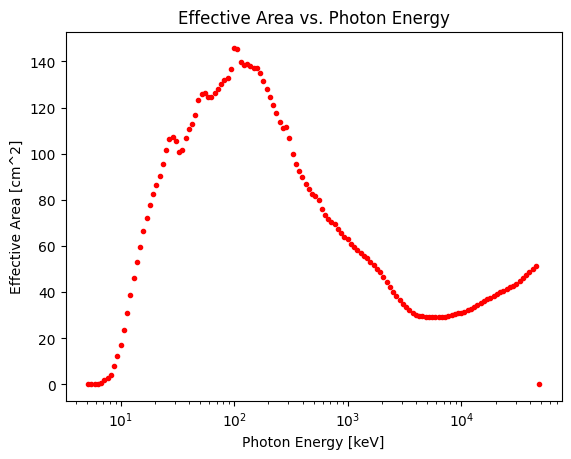

In [5]:
R = HDU1.data["MATRIX"]
print(R.shape)

Aeff = np.zeros(R.shape[0])
#print(Aeff)
for i in range(len(Aeff)):
    Aeff[i] = np.sum(R[i,:])

print(Aeff.shape)

plt.plot(Photon_Energies, Aeff, 'r.')
plt.xlabel("Photon Energy [keV]")
plt.ylabel("Effective Area [cm^2]")
plt.title("Effective Area vs. Photon Energy")
plt.xscale("log")
plt.show()

2. 

a) (2 points) Create a function that calculates the differential photon flux for a power-law spectrum at an array of photon energies. 

The function should take as inputs:

an array of photon energies

the spectral index, 

the normalization factor, C

The function should return an array of differential photon fluxes with the same length as the input photon energies 

The pivot energy can be fixed to 100 ke


In [6]:
def power_law_spectrum(energies, alpha, C, E0=100):
    """
    Compute the differential photon flux for a power-law spectrum.

    Parameters:
    energies : array-like
        Array of photon energies (keV)
    alpha : float
        Spectral index
    C : float
        Normalization factor (photons/cm^2/s/keV)
    E0 : float, optional
        Pivot energy (default is 100 keV)

    Returns:
    array-like : Differential photon flux
    """
    return C * (energies / E0) ** alpha


b) (3 points)

Using your function calculate the differential photon fluxes at the energies in Photon_Energies

Do this for a = -2, and C = 5x10-4 photons / cm2 / s / keV

Make a plot with the differential photon fluxes on the y-axis and Photon_Energies on the x-axis

Make both axes have a logarithmic scale (Hint: think about what a power-law should look like on a log-log scale)


c) (2 points) Repeat 2.b) but with a = -1, and C = 2x10-4 photons / cm2 / s / keV

d) (1 point) Which spectrum has a higher flux at lower energies, and which has a higher flux at higher energies? 

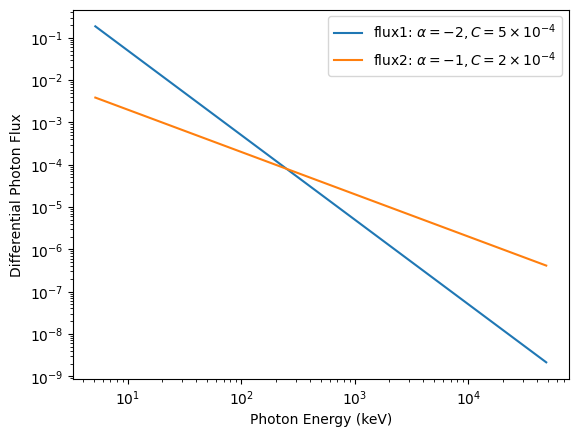

In [7]:
# Compute differential photon flux for given parameters
flux1 = power_law_spectrum(Photon_Energies, alpha=-2, C=5e-4)
flux2 = power_law_spectrum(Photon_Energies, alpha=-1, C=2e-4)

# Plot the results
plt.figure()
plt.plot(Photon_Energies, flux1, label=r"flux1: $\alpha=-2, C=5\times10^{-4}$")
plt.plot(Photon_Energies, flux2, label=r"flux2: $\alpha=-1, C=2\times10^{-4}$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Photon Energy (keV)")
plt.ylabel("Differential Photon Flux")
plt.legend()
plt.show()


## Flux 1 is higher at lower energy levels whie Flux 2 is higher at higher energy levels ##

$$N_{\text{detected}} = \sum \left( f_E \cdot A_{\text{eff}} \cdot \Delta E \right) \cdot \Delta t$$


(a) Compute Total Detected Photons for 2.b)

We will use the midpoint rule for integration:

In [8]:
# Compute bin widths (ΔE)
delta_E = HDU1.data["ENERG_HI"] - HDU1.data["ENERG_LO"]

# Compute total detected photons for spectrum in 2.b) (α = -2, C = 5e-4)
total_counts1 = np.sum(flux1 * Aeff * delta_E) * 10

# Print result
print(f"Total detected photons for α=-2, C=5e-4: {total_counts1:.2f}")

# Compute total detected photons for spectrum in 2.c) (α = -1, C = 2e-4)
total_counts2 = np.sum(flux2 * Aeff * delta_E) * 10

# Print result
print(f"Total detected photons for α=-1, C=2e-4: {total_counts2:.2f}")

Total detected photons for α=-2, C=5e-4: 412.39
Total detected photons for α=-1, C=2e-4: 123.48


(c) Compute Photons Detected in Each Energy Bin
To get counts per energy bin, we multiply each row in the DRM by 𝑓_𝐸, sum over energy bins, and multiply by observation time.

In [9]:
# Compute detected photons in each energy bin using matrix multiplication
counts_per_bin_1 = np.dot(HDU1.data["MATRIX"].T, (flux1 * delta_E * 10))
counts_per_bin_2 = np.dot(HDU1.data["MATRIX"].T, (flux2 * delta_E * 10))

# Print results
print("Counts per energy bin for α=-2, C=5e-4:", counts_per_bin_1)
print("Counts per energy bin for α=-1, C=2e-4:", counts_per_bin_2)



Counts per energy bin for α=-2, C=5e-4: [ 41.047382   172.37956     91.78044     64.10523     38.518513
   3.323762     0.8838276    0.35201108]
Counts per energy bin for α=-1, C=2e-4: [ 2.9896963 15.026735  16.95854   28.25338   43.08222    9.374131
  4.377743   3.4175525]


d) Plot counts for each energy bin


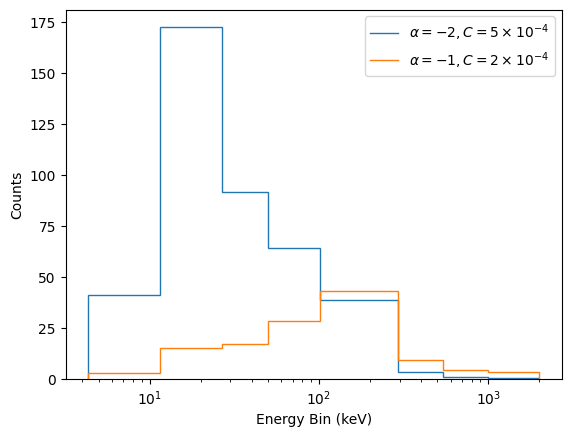

In [10]:
# Create energy bin edges
energy_bins = np.append(HDU2.data["E_MIN"], HDU2.data["E_MAX"][-1])

# Plot the counts
plt.figure()
plt.stairs(counts_per_bin_1, edges=energy_bins, label=r"$\alpha=-2, C=5\times10^{-4}$")
plt.stairs(counts_per_bin_2, edges=energy_bins, label=r"$\alpha=-1, C=2\times10^{-4}$")

plt.xscale("log")
plt.xlabel("Energy Bin (keV)")
plt.ylabel("Counts")
plt.legend()
plt.show()
